In [7]:
import pandas as pd
import openai

columns=["prompt","completion"]
data = pd.read_csv("../resources/extracted/data.csv", sep=",", header=None, names=columns)

In [8]:
for i, row in data.iterrows():
    prompt_val = row['prompt'] + '\n\n###\n\n'
    completion_val = ' ' + row['completion']
    data.at[i,'prompt'] = prompt_val
    data.at[i,'completion'] = completion_val

In [9]:
data

,prompt,completion
0,Напомнить мне позвонить Джону в 15:30\n\n###\n\n,reminder
1,Добавить встречу с клиентом на завтра в 10:00\...,calender
2,Сохранить список продуктов для покупки\n\n###\n\n,save
3,Помощь в настройке аккаунта\n\n###\n\n,chat
4,Встреча в 15:00\n\n###\n\n,calender
...,...,...
976,Я хочу научиться прыгать с парашютом в течение...,goal
977,Я хочу пройти 30-дневный фитнес-зачет и в конц...,goal
978,Я начну ежедневную практику благодарности и бу...,goal
979,Я собираюсь основать свою собственную благотво...,goal


In [10]:
data['completion'].value_counts()

 reminder       305
 chat           245
 goal           168
 save           101
 intention       56
 appointment     51
 event           45
 calender        10
Name: completion, dtype: int64

In [11]:
data.to_json("../resources/extracted/data.jsonl", orient='records', lines=True)

In [12]:
!openai tools fine_tunes.prepare_data -f "../resources/extracted/data.jsonl" -q

Analyzing...

- Your file contains 981 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- All prompts end with suffix `\n\n###\n\n`

No remediations found.
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `../resources/extracted/data_prepared_train.jsonl` and `../resources/extracted/data_prepared_valid.jsonl`
Feel free to take a look!

Now use that file when fine-tuning:
> openai api fine_tunes.create -t "../resources/extracted/data_prepared_train.jsonl" -v "../resources/extracted/data_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 8

After yo

In [23]:
!openai.api_key=''

'openai.api_key' is not recognized as an internal or external command,
operable program or batch file.


In [54]:
!openai -k '' api fine_tunes.create -t "../resources/extracted/data_prepared_train.jsonl" -v "../resources/extracted/data_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 8 -m babbage

^C


In [55]:
!openai -k '' api fine_tunes.follow -i ft-R3d2Ka55mj8eVcov3nbkx0iG

[2023-04-09 10:47:13] Created fine-tune: ft-R3d2Ka55mj8eVcov3nbkx0iG
[2023-04-09 10:47:22] Fine-tune costs $0.07
[2023-04-09 10:47:23] Fine-tune enqueued. Queue number: 0
[2023-04-09 10:47:26] Fine-tune started
[2023-04-09 10:49:58] Completed epoch 1/4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-R3d2Ka55mj8eVcov3nbkx0iG



In [31]:
!openai -k '' api fine_tunes.follow -i ft-Aq8lvY4xZOCKW1jGZ4yTJo6t

[2023-04-09 01:52:30] Created fine-tune: ft-Aq8lvY4xZOCKW1jGZ4yTJo6t
[2023-04-09 01:52:45] Fine-tune costs $0.05
[2023-04-09 01:52:45] Fine-tune enqueued. Queue number: 0

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-Aq8lvY4xZOCKW1jGZ4yTJo6t



In [32]:
!openai -k '' api fine_tunes.get -i ft-Aq8lvY4xZOCKW1jGZ4yTJo6t

{
  "created_at": 1680997950,
  "events": [
    {
      "created_at": 1680997950,
      "level": "info",
      "message": "Created fine-tune: ft-Aq8lvY4xZOCKW1jGZ4yTJo6t",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1680997965,
      "level": "info",
      "message": "Fine-tune costs $0.05",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1680997965,
      "level": "info",
      "message": "Fine-tune enqueued. Queue number: 0",
      "object": "fine-tune-event"
    }
  ],
  "fine_tuned_model": null,
  "hyperparams": {
    "batch_size": 1,
    "classification_n_classes": 8,
    "compute_classification_metrics": true,
    "learning_rate_multiplier": 0.1,
    "n_epochs": 4,
    "prompt_loss_weight": 0.01
  },
  "id": "ft-Aq8lvY4xZOCKW1jGZ4yTJo6t",
  "model": "ada",
  "object": "fine-tune",
  "organization_id": "org-pfcYbIXBEJy2mJ7JaOPA27jG",
  "result_files": [],
  "status": "pending",
  "training_files": [
    {
      "bytes": 93326,
      "creat

In [56]:
!openai -k '' api fine_tunes.results -i ft-R3d2Ka55mj8eVcov3nbkx0iG > "../resources/extracted/result-babbage.csv"

In [57]:
results = pd.read_csv("../resources/extracted/result-babbage.csv")
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
3138,3139,127563,3139,0.0048,1.0,1.0,NaN,NaN,NaN,0.923858,0.921363


<Axes: >

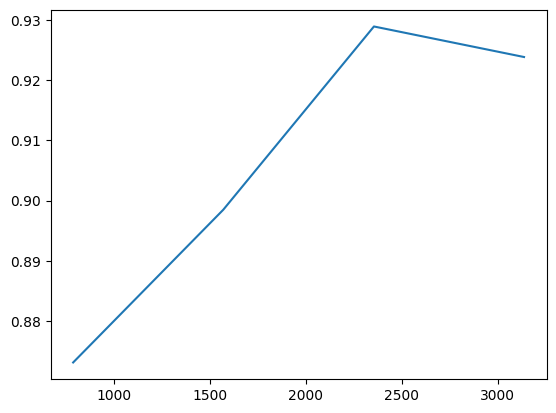

In [58]:
import matplotlib
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [45]:
test = pd.read_json('../resources/extracted/data_prepared_valid.jsonl', lines=True)
test.head()

,prompt,completion
0,Добавить встречу с клиентом на завтра в 10:00\...,calender
1,Встреча в 15:00\n\n###\n\n,calender
2,Напомнить мне о важной встрече в 12:00\n\n###\n\n,reminder
3,Сохранить фотографии в облако\n\n###\n\n,save
4,Напомнить мне о медицинской процедуре в 17:00\...,reminder


In [61]:
ft_ada_model = 'ada:ft-personal-2023-04-09-00-21-49'
ft_babbage_model = 'babbage:ft-personal-2023-04-09-08-57-14'
openai.api_key = ''
my_tests = [
    'Сколько стоит слетать на луну?',
    'Что такое ChatGPT',
    'Напомни выключить яйца через 10 минут',
    "Что такое напоминание",
    "Сколько напоминаний может быть в жизни",
    "Я скучный?",
    "Ты тоже",
    "Добавь в календарь следующее",
    "Сохрани для меня деньги",
    "Сколько стоит замок",
    "Завтра надо сходить к стоматологу в 10",
    "Я заберу дочку в 7 утра в пятницу, напомни плиз",
    "Надо снять с плиты сковородку через 20 минут",
]

for i in range(len(my_tests)):
    res = openai.Completion.create(model=ft_ada_model, prompt=my_tests[i] + '\n\n###\n\n', max_tokens=2, temperature=0, logprobs=8)
    print(my_tests[i])
    print(res['choices'][0]['logprobs']['top_logprobs'][0])
    res = openai.Completion.create(model=ft_babbage_model, prompt=my_tests[i] + '\n\n###\n\n', max_tokens=2, temperature=0, logprobs=8)
    print(my_tests[i])
    print(res['choices'][0]['logprobs']['top_logprobs'][0])

Сколько стоит слетать на луну?
{
  " cal": -9.007598,
  " chat": -0.0009576029,
  " count": -9.478199,
  " event": -10.509976,
  " number": -8.879754
}
Сколько стоит слетать на луну?
{
  " Chat": -10.761749,
  " appointment": -10.186461,
  " chat": -0.0004576428,
  " chats": -11.4307,
  " event": -7.973805
}
Что такое ChatGPT
{
  " Chat": -10.86589,
  " chat": -7.9946556e-05,
  " chats": -12.050728,
  " conversation": -11.58549,
  " talk": -10.793866
}
Что такое ChatGPT
{
  " Chat": -10.497473,
  " chat": -3.7028603e-05,
  " chats": -11.928509,
  " chatting": -14.00056,
  "chat": -13.885224
}
Напомни выключить яйца через 10 минут
{
  " appointment": -10.497839,
  " remind": -9.498304,
  " reminder": -0.0005627192,
  " reminders": -8.178525,
  " save": -10.544412
}
Напомни выключить яйца через 10 минут
{
  " appointment": -9.10258,
  " chat": -10.217216,
  " remind": -9.085461,
  " reminder": -0.00056760764,
  " reminders": -8.602856
}
Что такое напоминание
{
  " Chat": -11.49248,
  " c